# Analysis of the results

This notebook will contain the analysis of all of the results from all of the models.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import RcParams
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

classification_results_df = pd.read_csv('../results/predefined_classification_results.csv')

classification_results_df

,Model Name,Top 1%,Top 5%
0,ResNet18,24.002455,64.947823
1,ResNet34,24.248005,67.034988
2,ResNet50,21.485575,58.624924
3,ResNet101,21.915285,60.712093
4,ResNet152,19.643953,57.826889
5,AlexNet,19.030079,53.100060
6,GoogleNet,27.501535,71.516266
7,VGG11,20.871700,58.931862
8,VGG13,21.240025,59.116020
9,VGG16,20.933088,59.545734


Creating dataframe of losses for all models

In [2]:
loss_df = pd.read_csv('../models/predefined/state/loss_values.csv')
loss_df = loss_df[loss_df['Model Name'].str.contains('Pretrained') == False]
models = loss_df['Model Name'].unique()
loss_df


,Epochs,Training Loss,Testing Loss,Model Name
0,1,2.978375,2.801849,ResNet18
1,2,2.831150,2.721247,ResNet18
2,3,2.752328,2.639324,ResNet18
3,4,2.676400,2.619360,ResNet18
4,5,2.605212,2.560152,ResNet18
...,...,...,...,...
115,6,3.653820,3.308950,InceptionV3
116,7,3.647404,3.098201,InceptionV3
117,8,3.603206,2.916274,InceptionV3
118,9,3.485485,3.055642,InceptionV3


In [3]:
models

array(['ResNet18', 'ResNet34', 'ResNet50', 'ResNet101', 'ResNet152',
       'AlexNet', 'GoogleNet', 'VGG11', 'VGG13', 'VGG16', 'VGG19',
       'InceptionV3'], dtype=object)

Setting Seaborn theme and styling

In [4]:
myrcparams = RcParams({'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.grid': True,
          'axes.labelcolor': '.15',
          'axes.linewidth': 0.0,
          'figure.facecolor': 'white',
          'font.family': ['serif'],
          'grid.color': 'white',
          'grid.linestyle': '--',
          'image.cmap': 'Greys',
          'legend.frameon': False,
          'legend.numpoints': 1,
          'legend.scatterpoints': 1,
          'lines.solid_capstyle': 'round',
          'text.color': '.15',
          'xtick.color': '.15',
          'xtick.direction': 'out',
          'xtick.major.size': 0.0,
          'xtick.minor.size': 0.0,
          'ytick.color': '.15',
          'ytick.direction': 'out',
          'ytick.major.size': 0.0,
          'ytick.minor.size': 0.0})

plt.style.library['seaborn-whitegrid']
RcParams.update(myrcparams)

## Plotting Testing and Training Losses for All Models
- Two separate graphs for testing and training loss, allowing a visual comparison of all the models

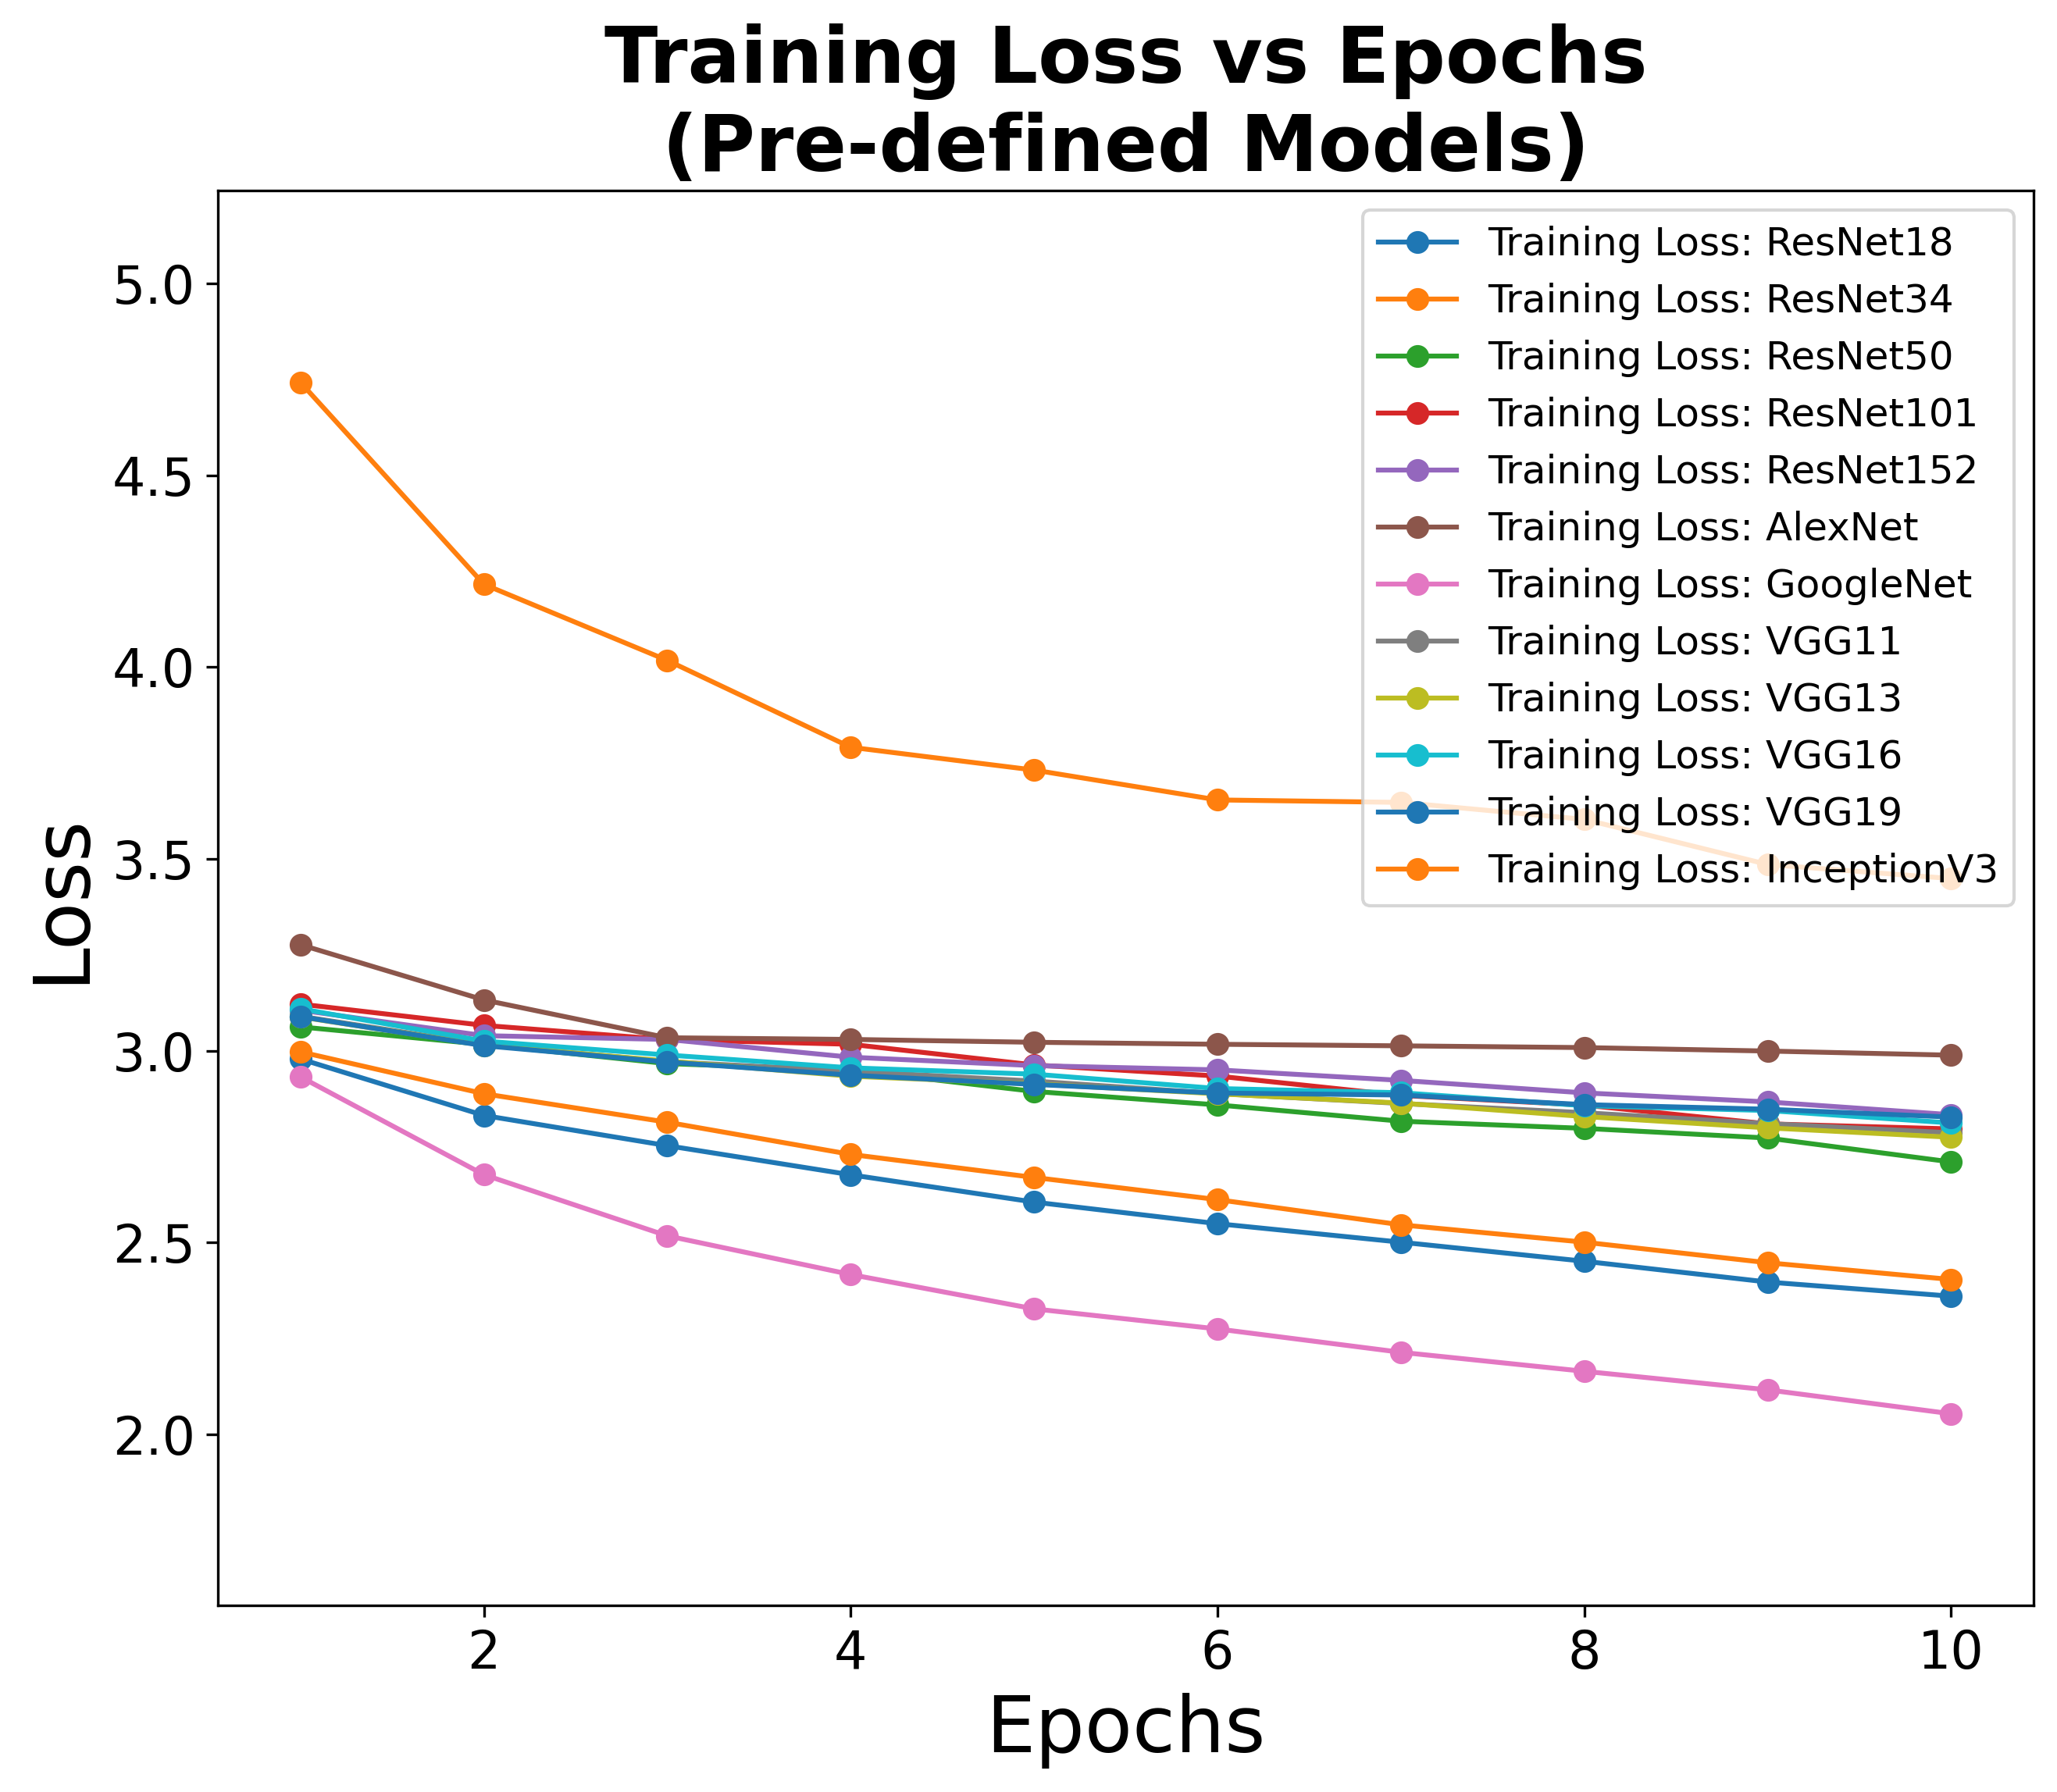

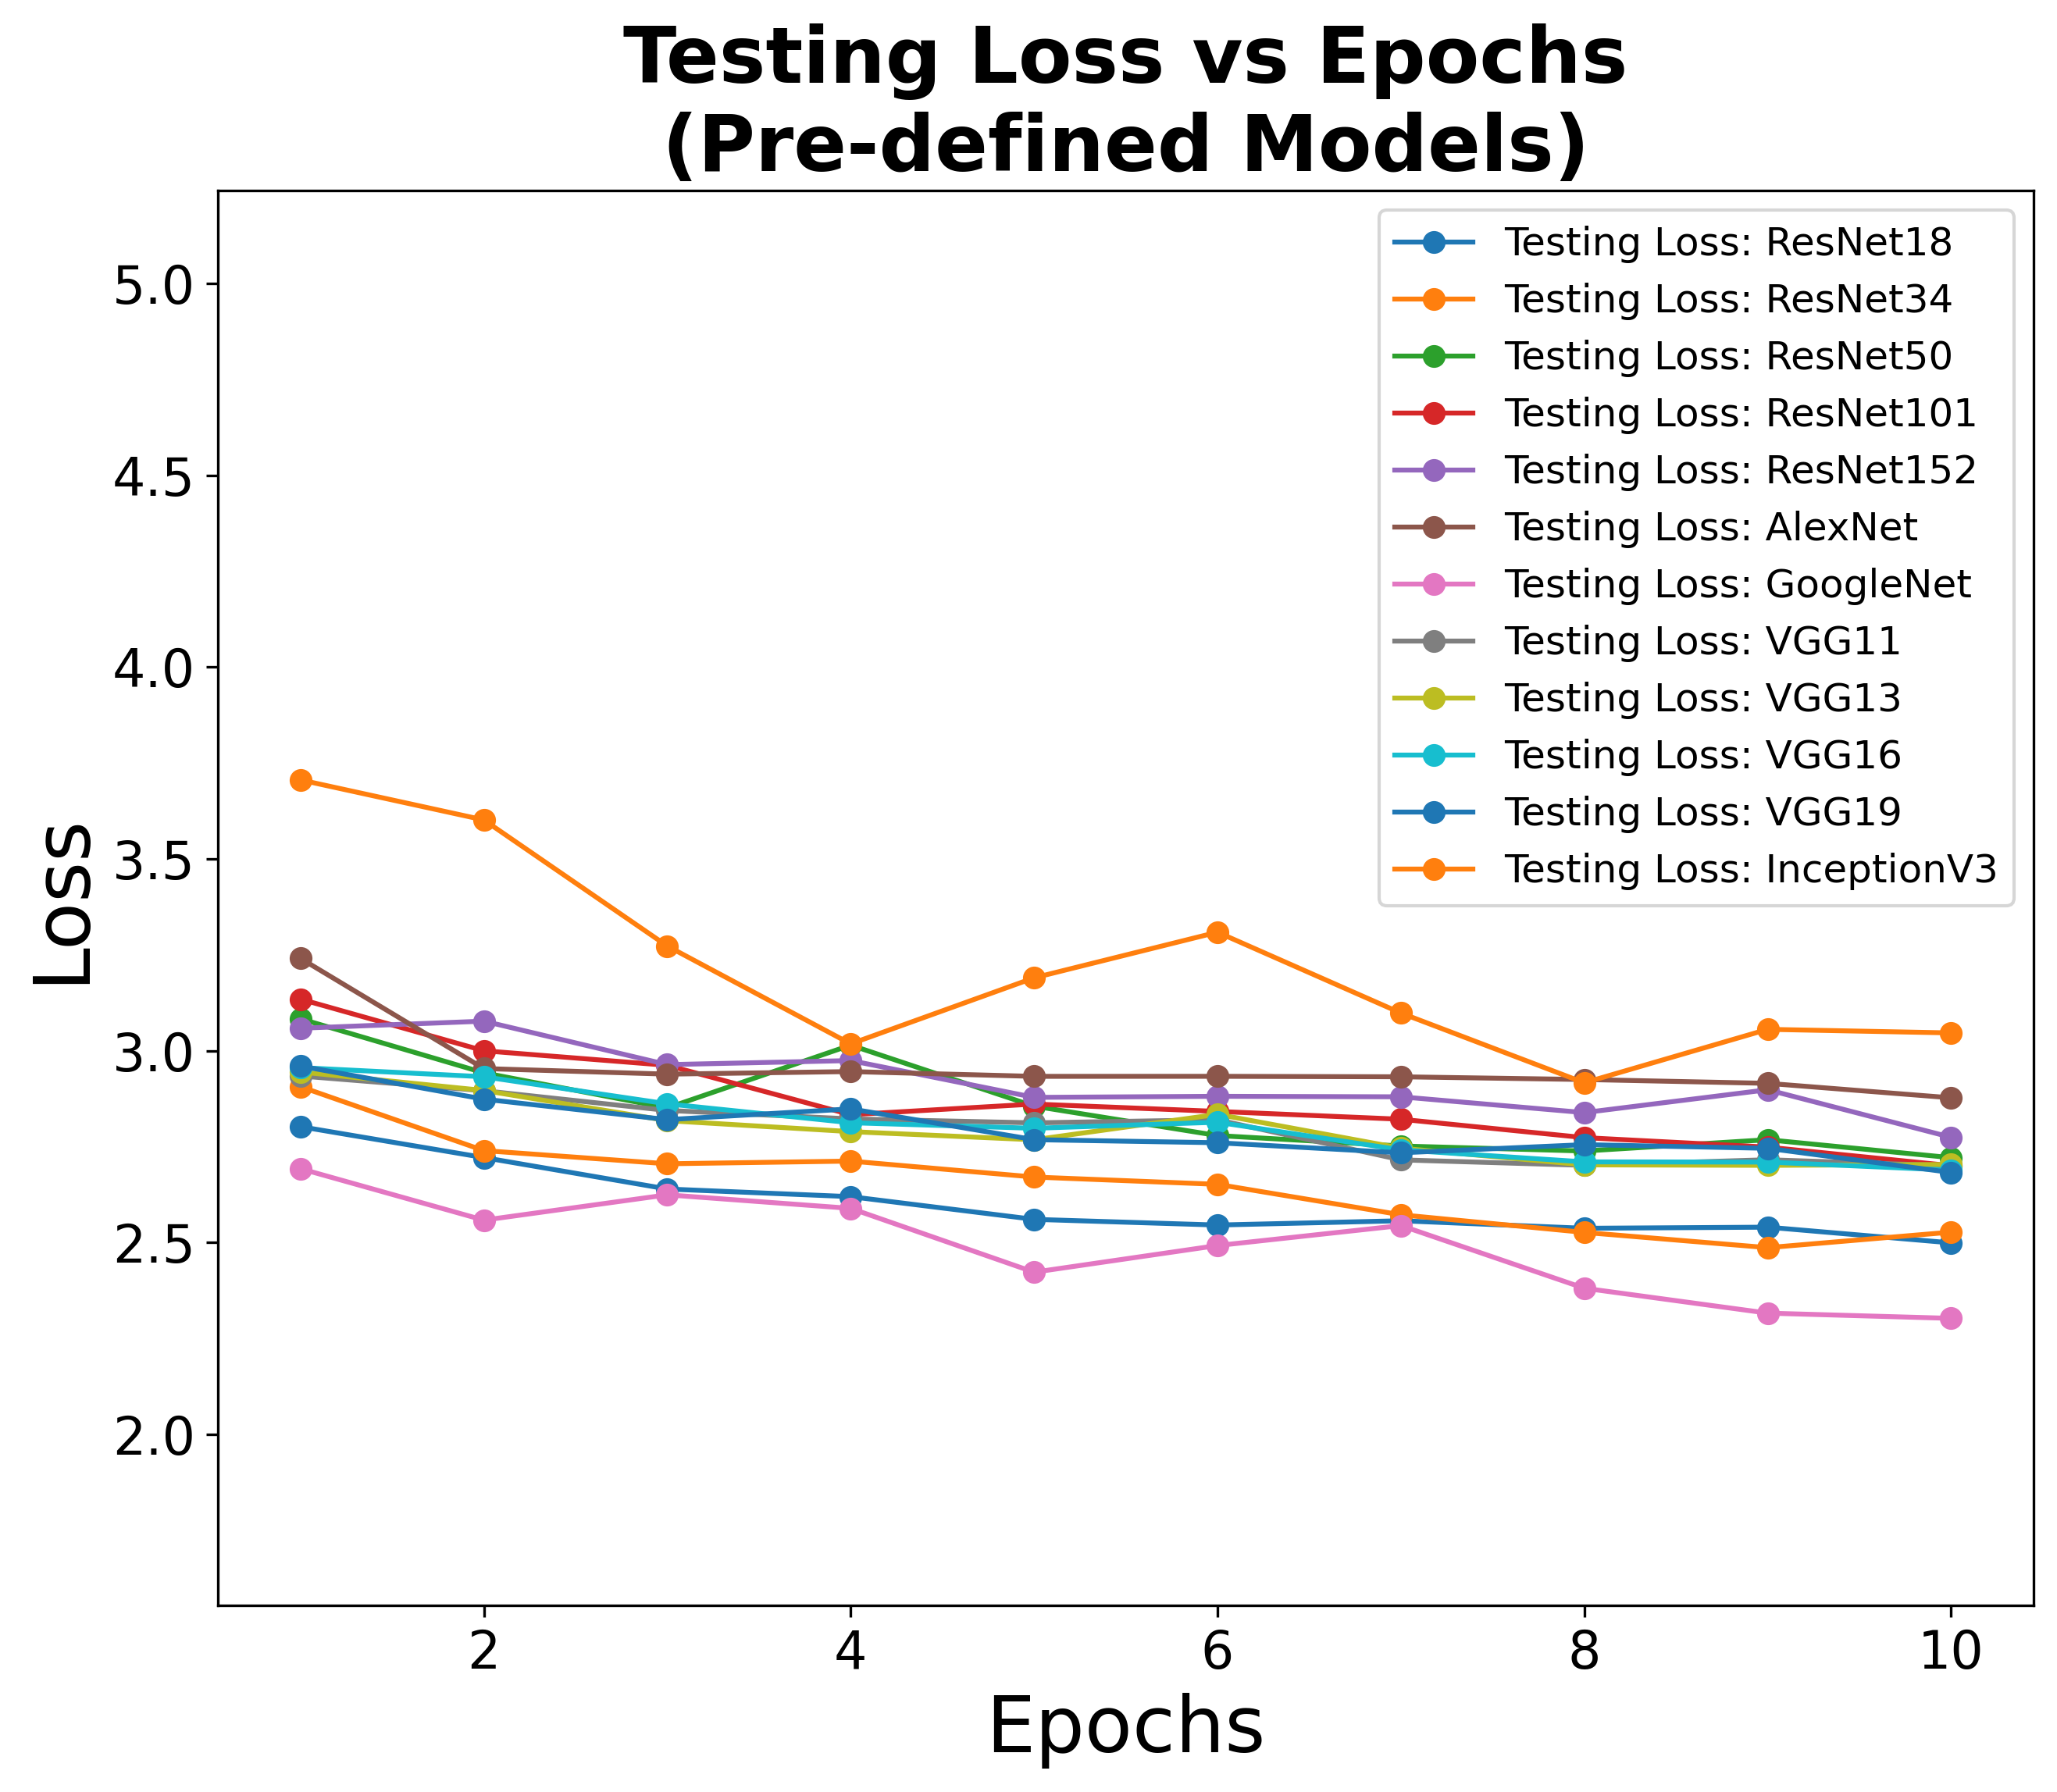

In [5]:
# getting max yval so that plots have same y-axis for better comparison 
max_yval = np.maximum(loss_df['Training Loss'], loss_df['Testing Loss']).max()
min_yval = np.minimum(loss_df['Training Loss'], loss_df['Testing Loss']).min()

# getting the two graphs for testing and training loss 
for loss in ['Training Loss', 'Testing Loss']:
    fig, ax = plt.subplots(figsize = (10,8), dpi = 300)
    for model in models:
        ax.plot(loss_df[loss_df['Model Name'] == model]['Epochs'], loss_df[loss_df['Model Name'] == model][loss], '-o', label = loss + ": " + model, linewidth = 1.5)
        ax.set_xlabel("Epochs", fontsize = 24)
        ax.set_ylabel("Loss", fontsize = 24)
        ax.tick_params(
            axis = 'both',
            labelsize = 16)
        ax.legend(fontsize = 12)
        ax.set_ylim([min_yval - 0.5, max_yval + 0.5])
        ax.set_title(loss + " vs Epochs\n(Pre-defined Models)", fontsize = 24, fontweight = 'bold')
    plt.savefig("output/Predefined " + loss + " vs Epochs.jpg", dpi = 300, bbox_inches = 'tight')
    plt.savefig("output/Predefined " + loss + " vs Epochs.pdf", dpi = 300, bbox_inches = 'tight')    
    plt.show()
        

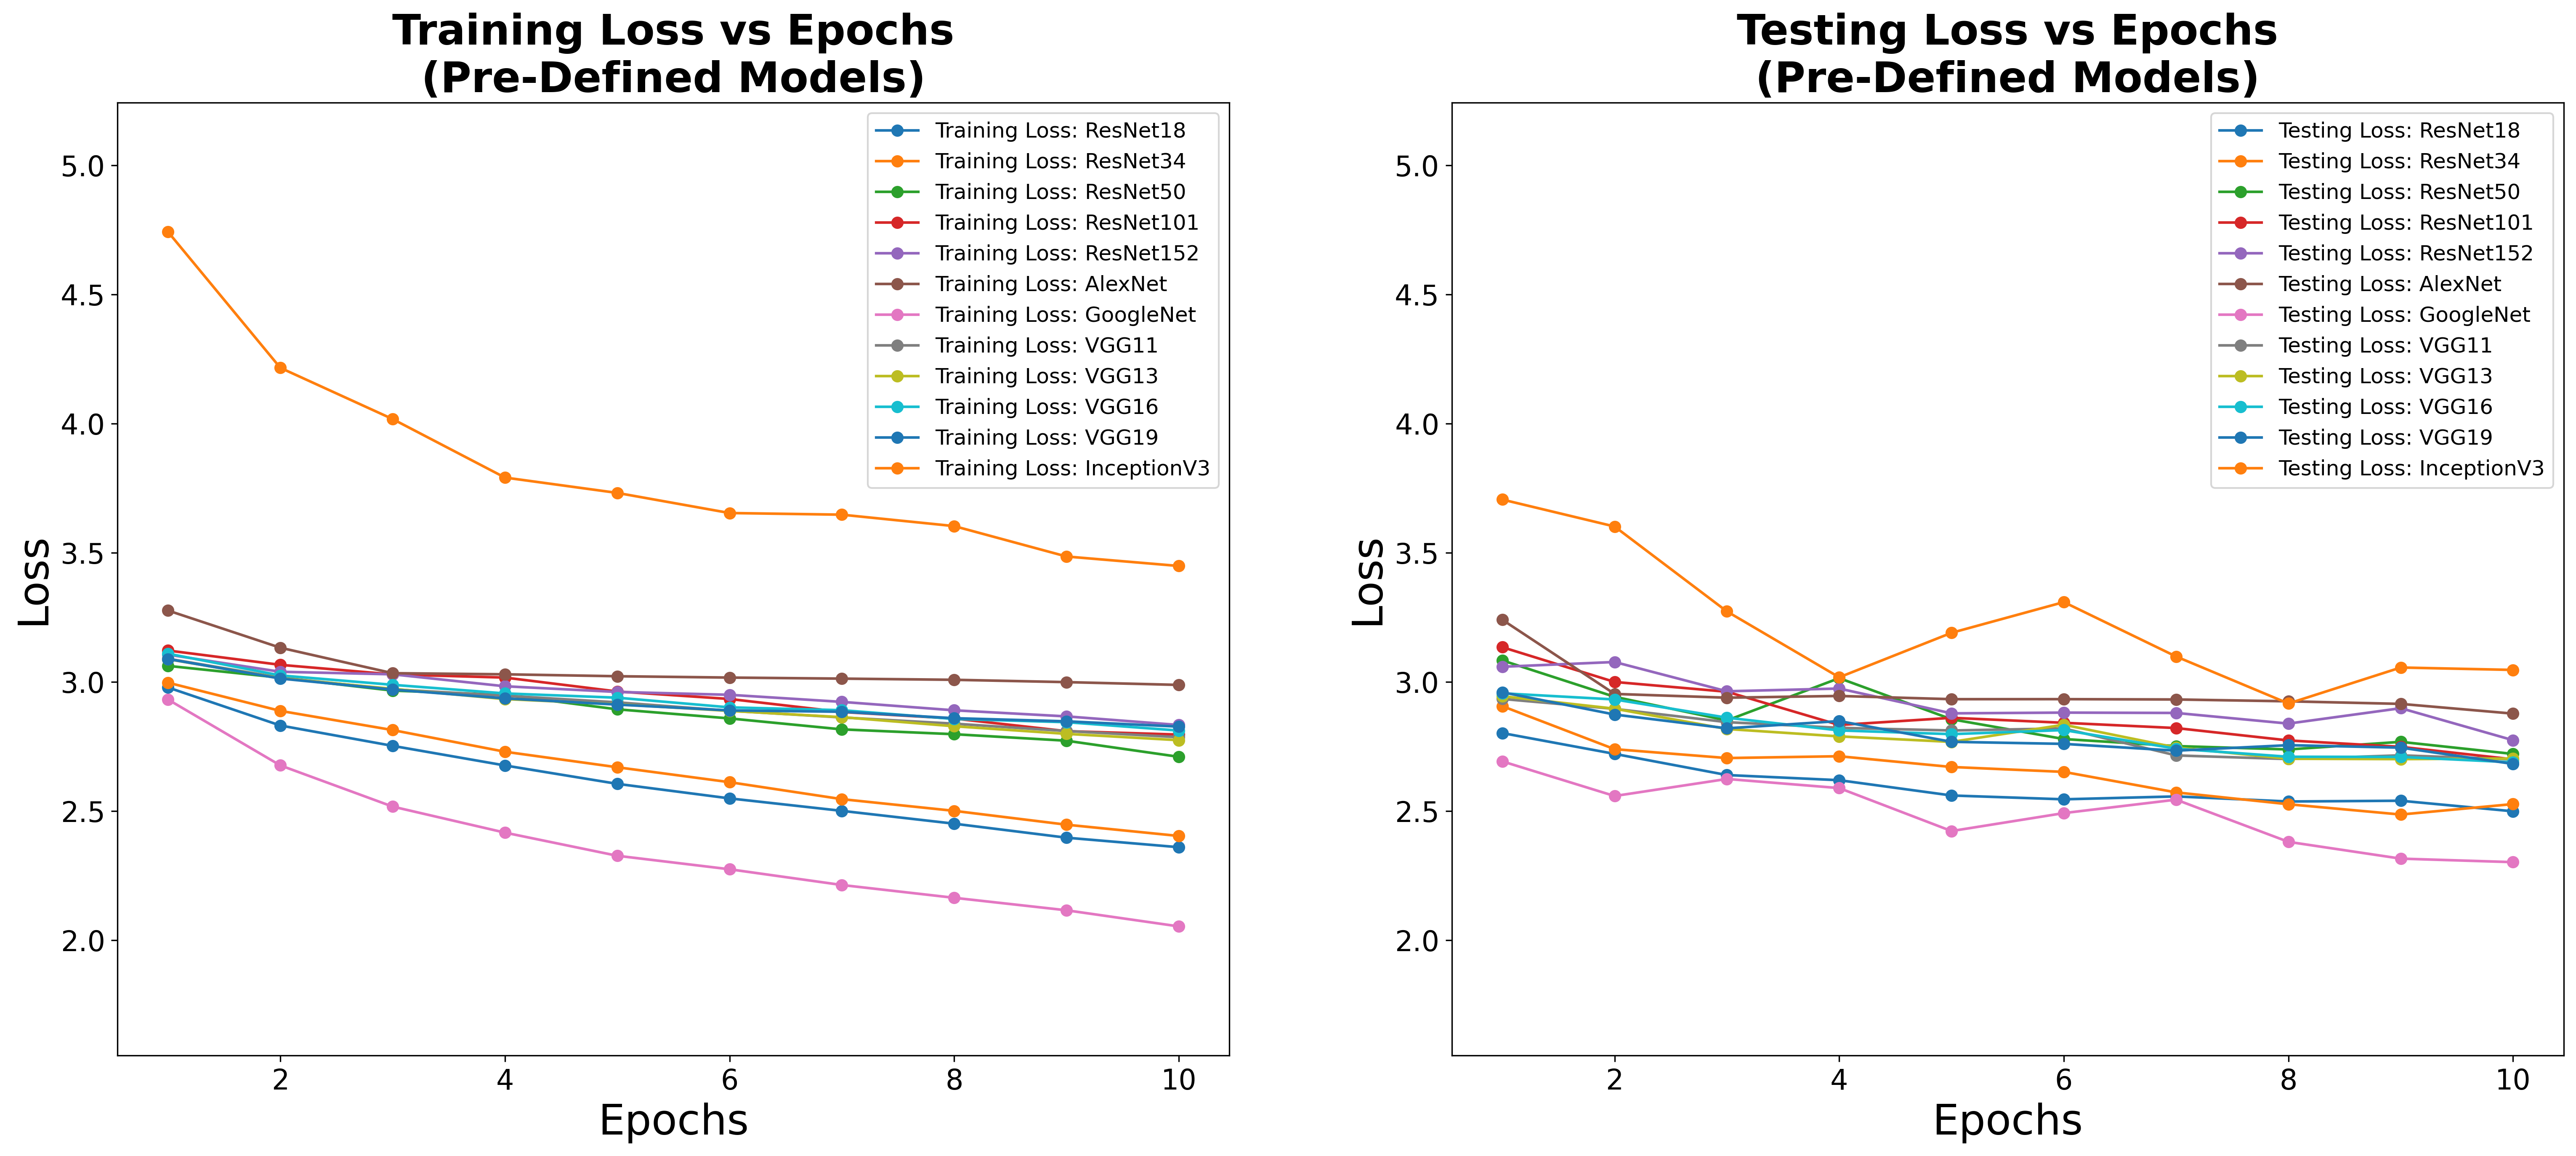

In [6]:
# getting max yval so that plots have same y-axis for better comparison 
max_yval = np.maximum(loss_df['Training Loss'], loss_df['Testing Loss']).max()
min_yval = np.minimum(loss_df['Training Loss'], loss_df['Testing Loss']).min()

# getting the two graphs for testing and training loss 
fig, ax = plt.subplots(1, 2, figsize = (25,10), dpi = 300)
for idx, loss in enumerate(['Training Loss', 'Testing Loss']):
    for model in models:
        ax[idx].plot(loss_df[loss_df['Model Name'] == model]['Epochs'], 
                        loss_df[loss_df['Model Name'] == model][loss], 
                        '-o', 
                        label = loss + ": " + model.replace('PretrainedCustom', ''), 
                        linewidth = 1.5)
        ax[idx].set_xlabel("Epochs", fontsize = 24)
        ax[idx].set_ylabel("Loss", fontsize = 24)
        ax[idx].tick_params(
            axis = 'both',
            labelsize = 16)
        ax[idx].legend(fontsize = 12)
        ax[idx].set_ylim([min_yval - 0.5, max_yval + 0.5])
        ax[idx].set_title(f"{loss} vs Epochs\n(Pre-Defined Models)", fontsize = 24, fontweight = 'bold')
plt.savefig(f"output/Predefined Loss vs Epochs_side_by_side.jpg", dpi = 300, bbox_inches = 'tight')
plt.savefig(f"output/Predefined Loss vs Epochs_side_by_side.pdf", dpi = 300, bbox_inches = 'tight')    
plt.show()
        

## Plotting Grouped Barcharts by Accuracy and Model Type

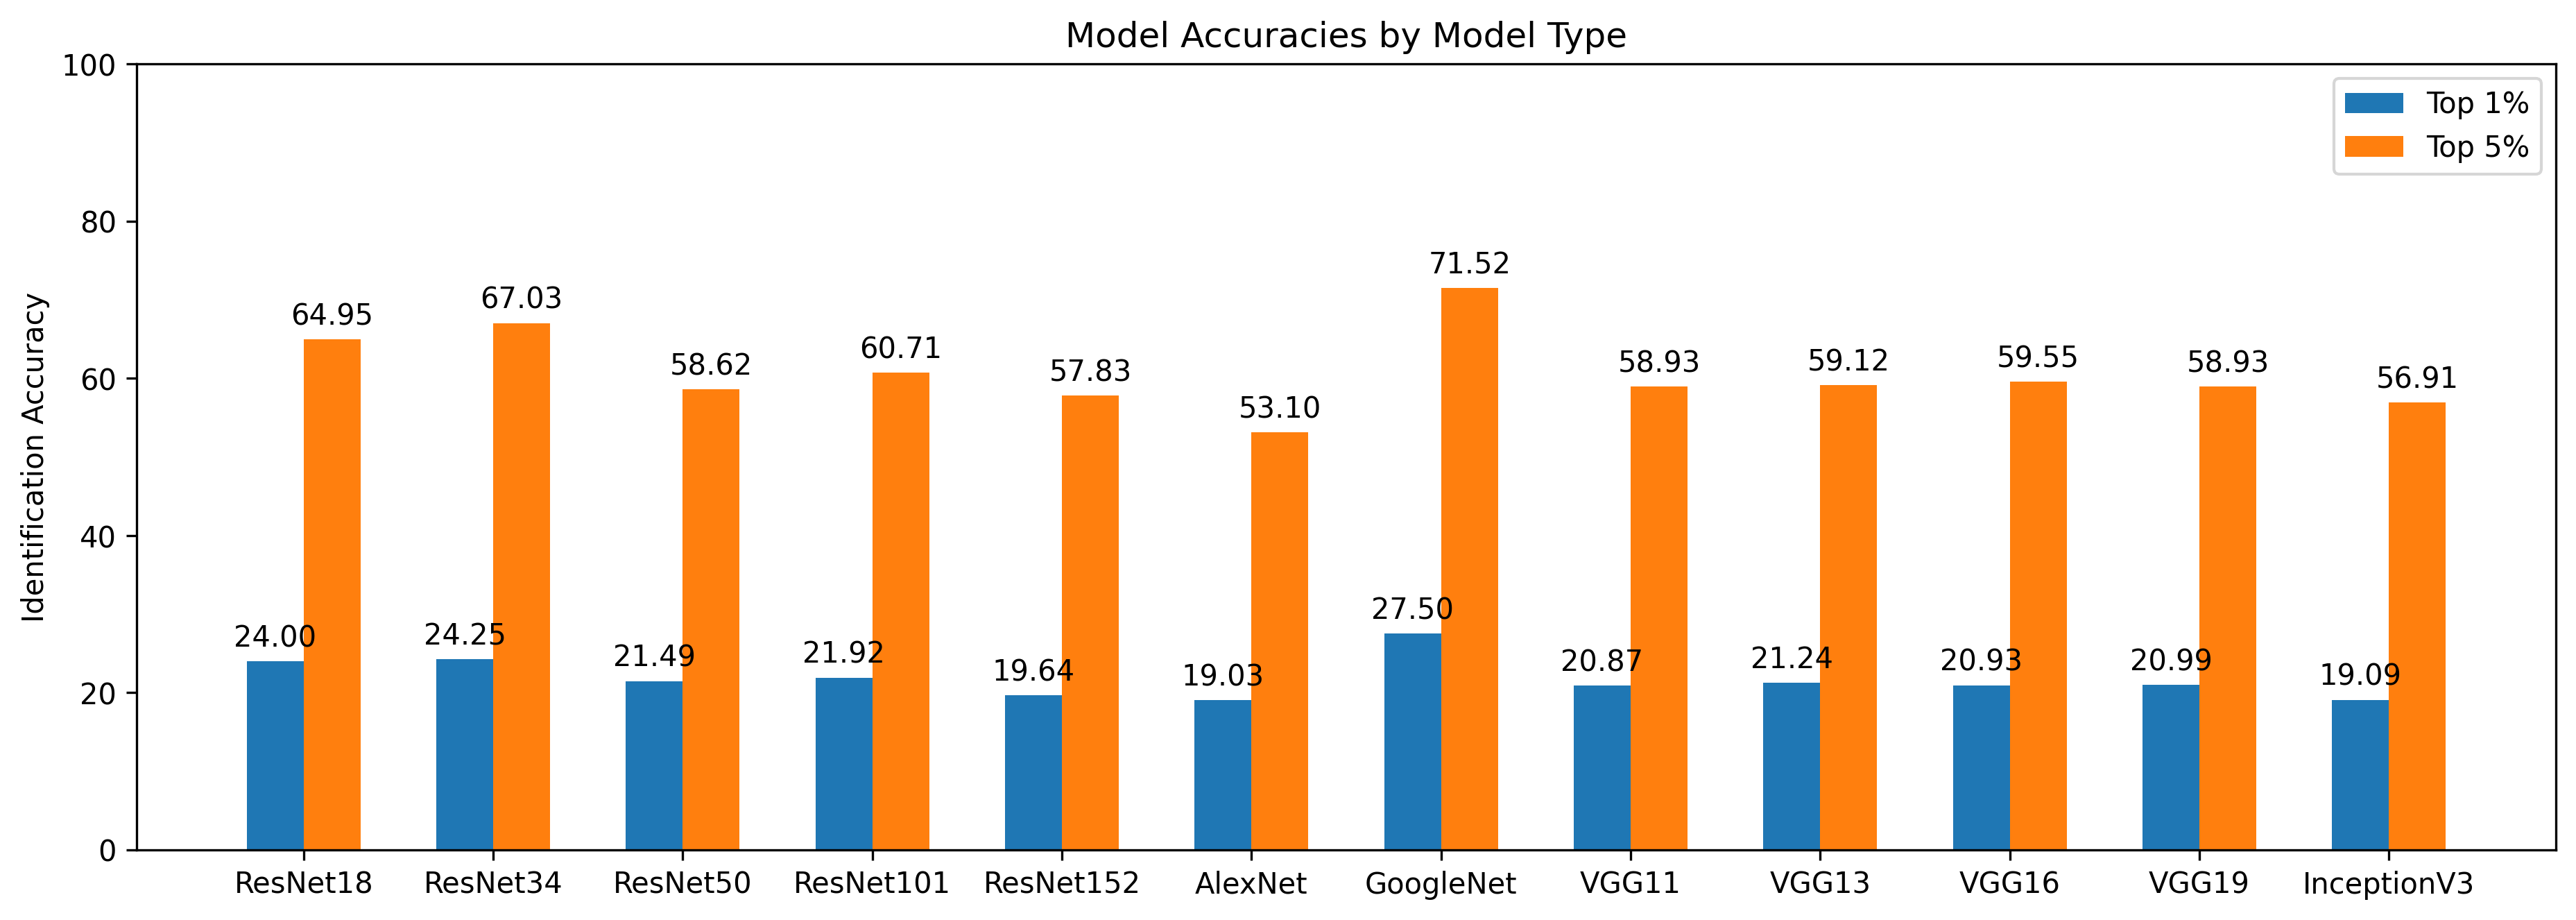

In [7]:
width = 0.3

# plotting grouped barcharts by model 
fig, ax = plt.subplots(figsize = (15,5), dpi = 300)
top1 = ax.bar(np.arange(len(classification_results_df)) - width/2, classification_results_df['Top 1%'], width, label = "Top 1%")
top5 = ax.bar(np.arange(len(classification_results_df)) + width/2, classification_results_df['Top 5%'], width, label = "Top 5%")

# adding axis attributes
ax.set_ylabel('Identification Accuracy')
ax.set_title('Model Accuracies by Model Type')
ax.set_ylim([0, 100])
ax.set_xticks(np.arange(len(classification_results_df)))
ax.set_xticklabels(classification_results_df['Model Name'])

# adding labels on top of bars
ax.bar_label(top1, padding=3, fmt='%.2f')
ax.bar_label(top5, padding=3, fmt='%.2f')
ax.legend()

plt.savefig("output/Predefined Model Accuracies.jpg", dpi = 300, bbox_inches = 'tight')
plt.savefig("output/Predefined Model Accuracies.pdf", dpi = 300, bbox_inches = 'tight')
plt.show()

## Plotting Heatmaps of Model Classifications versus Ground Truth Classifications

In [8]:
# TODO - need to get predicted versus true values for each of the models 

# for model in models:
    # conf = confusion_matrix(y_pred= pred, y_true = correct)
    # fig,ax = plt.subplots(figsize = (15,15))
    # plt.imshow(conf, interpolation='none', cmap = 'YlOrRd_r')
    # plt.savefig("output/" + model + " Heatmap.jpg", dpi = 300, bbox_inches = 'tight')
    # plt.savefig("output/" + model + " Heatmap.pdf", dpi = 300, bbox_inches = 'tight')    
    # plt.show()